<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/imdb_no_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [3]:
'''
Probably need to merge this X_train and X_test, 
than partition again in some better proportion(train: 80% | test: 20%).

Fill review arrarys with zeros to have same lenght.
'''
print(f'Train Sets Shapes.....X_train: {X_train.shape}')
print(f'Train Sets Shapes.....y_train: {y_train.shape}')
print(f'Train Sets Largest Review Size: {max([max(review) for review in X_train])}')
print(f'Tests Sets Shapes.....X_test: {X_test.shape}')
print(f'Tests Sets Shapes.....y_test: {y_test.shape}')
print(f'Train Sets Largest Review Size: {max([max(review) for review in X_test])}')

Train Sets Shapes.....X_train: (25000,)
Train Sets Shapes.....y_train: (25000,)
Train Sets Largest Review Size: 9999
Tests Sets Shapes.....X_test: (25000,)
Tests Sets Shapes.....y_test: (25000,)
Train Sets Largest Review Size: 9999


In [4]:
# Thanks to https://github.com/kashif/tf-keras-tutorial/blob/tf2/3-imdb.ipynb
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [5]:
# Thanks to https://github.com/kashif/tf-keras-tutorial/blob/tf2/3-imdb.ipynb
y_train = np.reshape(np.asarray(y_train, dtype=np.float32), (len(X_train), 1))
y_test = np.reshape(np.asarray(y_test, dtype=np.float32), (len(X_test), 1))

In [6]:
class DenseNet:
  @staticmethod
  def build(input_shape, 
            n_classes, 
            activation='relu', 
            weights_path=None):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(32, activation=activation, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.8))

    model.add(tf.keras.layers.Dense(64, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.8))


    model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

    # if a weights path is supplied (inicating that the model was
    # pre-trained), then load the weights
    if weights_path is not None:
      model.load_weights(weights_path)
    
    return model

In [7]:
n_epochs = 100 
ini_learning_rate = 1e-3
batch_size=128

In [8]:
train_model = DenseNet.build(input_shape=(10000, ), 
                             n_classes=1, 
                             activation='relu', 
                             weights_path=None)

opt = tf.keras.optimizers.Adam(learning_rate=ini_learning_rate,
                               beta_1=0.9, 
                               beta_2=0.999, 
                               epsilon=1e-08,
                               decay=ini_learning_rate/n_epochs)

train_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                    optimizer=opt, 
                    metrics=[tf.keras.metrics.BinaryAccuracy()])

train_model.summary()

tensorboard = tf.keras.callbacks.TensorBoard('./logs/fit/',
                                          write_images=True)

callbacks_list = [tensorboard]

fit_history = train_model.fit(x=X_train,
                              y=y_train,
                              epochs=n_epochs,
                              validation_split=0.1,
                              validation_freq=1,
                              batch_size=batch_size,
                              callbacks=callbacks_list,
                              verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


176/176 [==============================] - 4s 14ms/step - loss: 1.6951 - binary_accuracy: 0.5795 - val_loss: 1.1972 - val_binary_accuracy: 0.8164
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 1.1158 - binary_accuracy: 0.7369 - val_loss: 0.8405 - val_binary_accuracy: 0.8740
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.8329 - binary_accuracy: 0.8127 - val_loss: 0.6534 - val_binary_accuracy: 0.8836
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.6770 - binary_accuracy: 0.8428 - val_loss: 0.5614 - val_binary_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.5885 - binary_accuracy: 0.8616 - val_loss: 0.5158 - val_binary_accuracy: 0.8844
Epoch 6/100
176/176 [==============================] - 2s 13ms/step - loss: 0.5464 - binary_accuracy: 0.8672 - val_loss: 0.4989 - val_binary_accuracy: 0.8804
Epoch 7/100
176/176 [==============================] - 2s 13ms/s

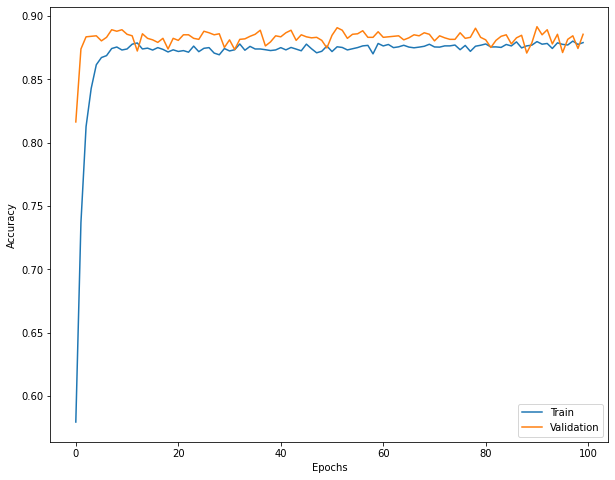

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(fit_history.history['binary_accuracy'], label='Train')
ax = plt.plot(fit_history.history['val_binary_accuracy'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.legend()

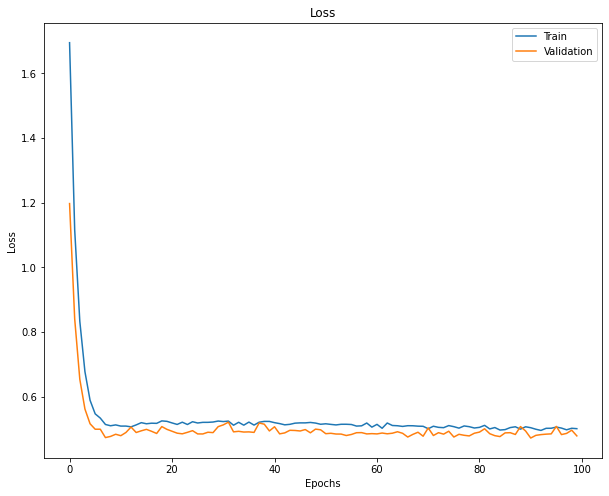

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(fit_history.history['loss'], label='Train')
ax = plt.plot(fit_history.history['val_loss'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Loss')
ax = plt.title('Loss')
ax = plt.legend()